In [1]:
import numpy as np
import pandas as pd
import pickle
import pymc3 as pm

from generate_data import vectorize_all_responses
from dist_utils import plot_cluster_assignments, plot_components

E:\Program_Files\Anaconda\envs\testpymc3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
X, functions, goals = vectorize_all_responses()

In [3]:
fmax = functions.argmax(axis=1)

In [4]:
fm_X = np.array([X[:,:,:,i] for i in range(X.shape[3]) if goals[i] == 'find_max_last']).transpose(1,2,3,0)
fm_fmax = np.array([fmax[i] for i in range(len(fmax)) if goals[i] == 'find_max_last'])

In [5]:
ms_X = np.array([X[:,:,:,i] for i in range(X.shape[3]) if goals[i] == 'max_score_last']).transpose(1,2,3,0)
ms_fmax = np.array([fmax[i] for i in range(len(fmax)) if goals[i] == 'max_score_last'])

In [6]:
with open('../data_phase_ucb.pkl', 'rb') as f:
    trace = pickle.load(f)

In [7]:
trace_df = pm.trace_to_dataframe(trace)

## Find-Max Participants

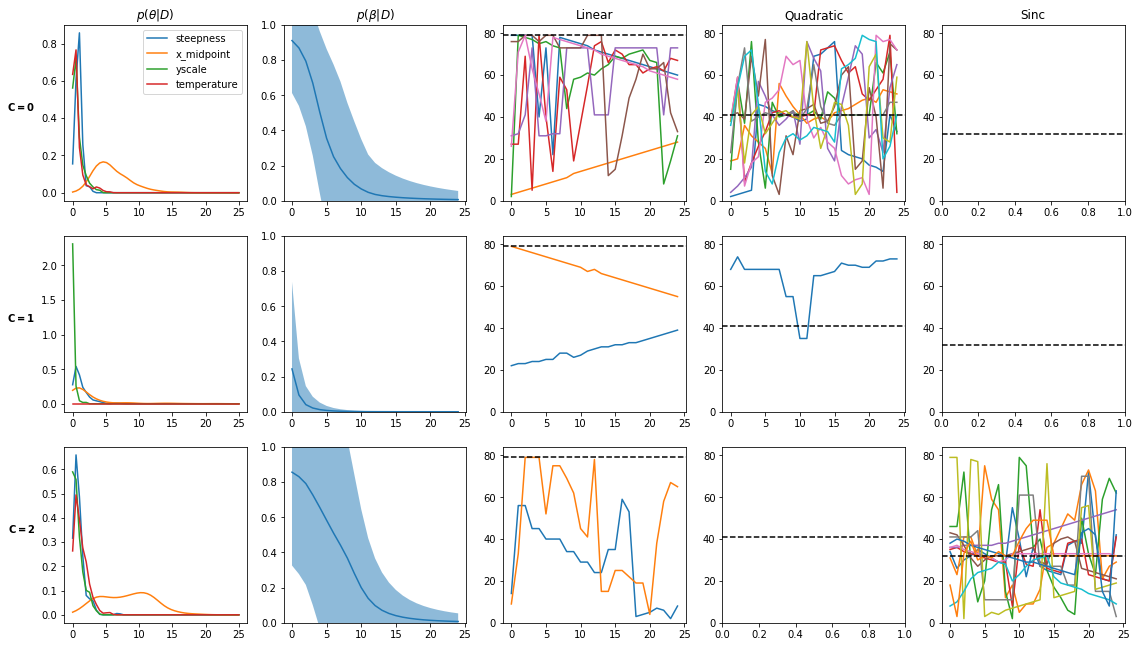

In [8]:
fm_fig = plot_cluster_assignments(trace, fm_X, fm_fmax, figsize=(19,11))

## Max-Score Participants

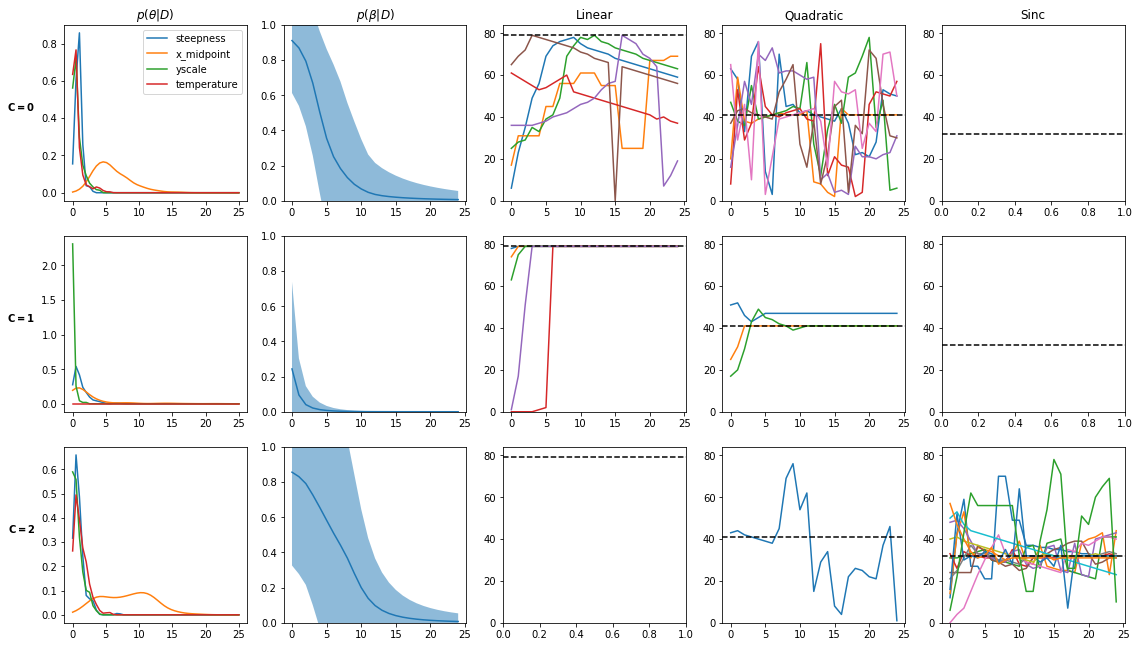

In [9]:
ms_fig = plot_cluster_assignments(trace, ms_X, ms_fmax, figsize=(19,11))